<a href="https://colab.research.google.com/github/inefable12/consultas_scopus_api/blob/main/Consultas_en_SCOPUS_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Jesus Alvarado-Huayhuaz

inefable12@gmail.com

# Requerimientos

## PyScopus

In [1]:
!pip install pyscopus==1.0.3a2

Librerías



In [2]:
from pyscopus import Scopus
import numpy
import pandas
import requests

### Enlace del Colab con Scopus (API KEY)

*   El usuario debe disponer de una clave **personal**
*   Más información en https://dev.elsevier.com/




In [4]:
key = "tu_clave_personal"
scopus = Scopus(key)

## Búsqueda:

Ejemplo:

TITLE-ABS-KEY((("oxytocin") AND ("cheminformatics") AND ("docking")) OR ("oxytocin" AND "dog" AND "docking")  OR ("oxytocin" AND "virtual" AND "simulations"))

In [26]:
s = input("Ingresa tus palabras de búsqueda: ")
search_df = scopus.search(s, count=200,view='STANDARD')

Ingresa tus palabras de búsqueda: TITLE-ABS-KEY((("oxytocin") AND ("cheminformatics") AND ("docking")) OR ("oxytocin" AND "dog" AND "docking") OR ("oxytocin" AND "virtual" AND "simulations"))


In [27]:
from IPython.display import display
display(search_df)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85146322298,Structure based Drug Designing Approaches in S...,Current Topics in Medicinal Chemistry,15680266,None,18734294,22,2396-2409,2022-11-01,10.2174/1568026623666221103091658,1,[{'name': 'Indian Institute of Technology Madr...,Journal,Review,[],None
1,85106770529,In-silico screening of bioactive phytopeptides...,Journal of Biomolecular Structure and Dynamics,07391102,None,15380254,40,4475-4487,2022-01-01,10.1080/07391102.2020.1859411,4,"[{'name': 'Khulna University', 'city': 'Khulna...",Journal,Article,[],None
2,85122846488,Structure-Based Virtual Screening for Ligands ...,Pharmacological Reviews,00316997,None,15210081,73,527-656,2021-10-01,10.1124/PHARMREV.120.000246,33,"[{'name': 'Uppsala Universitet', 'city': 'Upps...",Journal,Article,[],None
3,84955104064,Computational approaches to developing short c...,Methods in Molecular Biology,10643745,None,None,1268,241-271,2015-01-01,10.1007/978-1-4939-2285-7_11,22,None,Book Series,Article,[],None
4,84861781307,Real-time human-robot interaction underlying n...,Neural Networks,08936080,None,18792782,32,130-137,2012-08-01,10.1016/j.neunet.2012.02.029,5,"[{'name': 'University of Nevada, Reno', 'city'...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
5,33749241358,A fast surface-matching procedure for protein-...,Journal of Molecular Modeling,16102940,None,09485023,12,965-972,2006-09-01,10.1007/s00894-006-0109-z,13,[{'name': 'Empresa Brasileira de Pesquisa Agro...,Journal,Article,[],None


## Artículos, conference papers, books, etc

In [28]:
search_df.subtype_description.unique()

array(['Review', 'Article'], dtype=object)

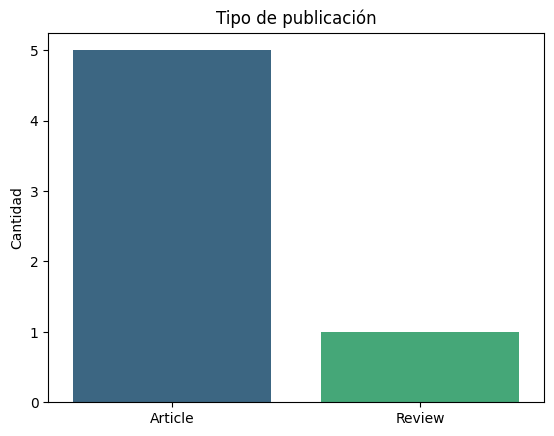

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada tipo de publicación y ordenar los datos por el índice
subtype_description = search_df['subtype_description'].value_counts()

# Crear el gráfico de barras con coloración por tipo de publicación
ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')

# Agregar etiquetas y título
plt.ylabel('Cantidad')
plt.title('Tipo de publicación')

# Formatear el eje y con un decimal
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Mostrar el gráfico
plt.show()

In [30]:
import pandas as pd

# Dividir la columna "cover_date" y crear la columna "year"
search_df['year'] = search_df['cover_date'].apply(lambda x: x.split('-')[0])

In [31]:
search_df.head(3)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text,year
0,85146322298,Structure based Drug Designing Approaches in S...,Current Topics in Medicinal Chemistry,15680266,None,18734294,22,2396-2409,2022-11-01,10.2174/1568026623666221103091658,1,[{'name': 'Indian Institute of Technology Madr...,Journal,Review,[],None,2022
1,85106770529,In-silico screening of bioactive phytopeptides...,Journal of Biomolecular Structure and Dynamics,07391102,None,15380254,40,4475-4487,2022-01-01,10.1080/07391102.2020.1859411,4,"[{'name': 'Khulna University', 'city': 'Khulna...",Journal,Article,[],None,2022
2,85122846488,Structure-Based Virtual Screening for Ligands ...,Pharmacological Reviews,00316997,None,15210081,73,527-656,2021-10-01,10.1124/PHARMREV.120.000246,33,"[{'name': 'Uppsala Universitet', 'city': 'Upps...",Journal,Article,[],None,2021


## Frecuencia de publicaciones por año

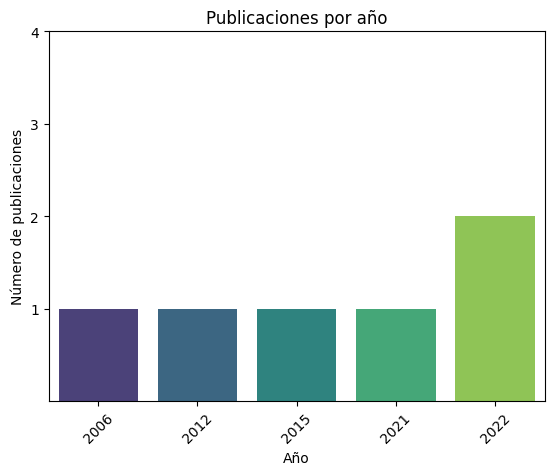

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada año y ordenar los datos por el índice
year_counts = search_df['year'].value_counts().sort_index()

# Crear el gráfico de barras con coloración por año
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de publicaciones')
plt.title('Publicaciones por año')
plt.xticks(rotation=45)

# Establecer los valores del eje y
ax.set_yticks([1, 2, 3, 4])

# Mostrar el gráfico
plt.show()

In [33]:
search_df.citation_count.unique()

array([ 1,  4, 33, 22,  5, 13])

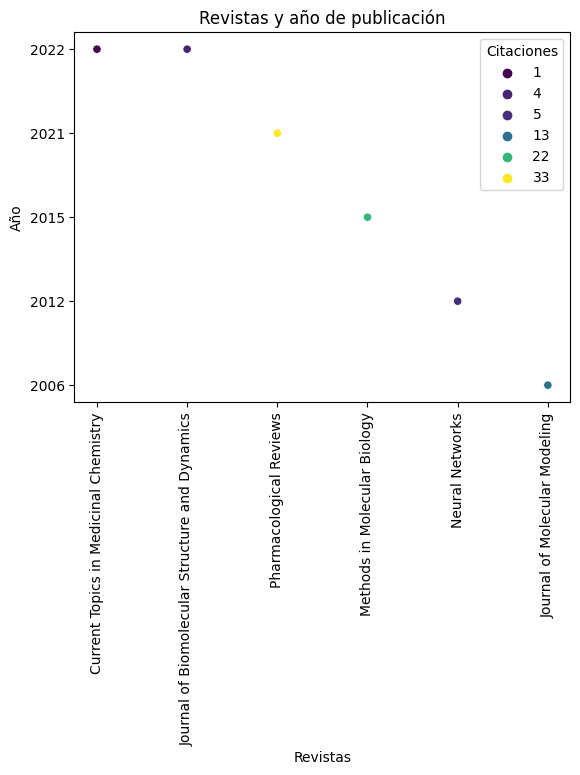

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df) #.sort_index(ascending=False)

# Crear el gráfico de dispersión con coloración por recurrencia
sns.scatterplot(data=df, x='publication_name', y='year', hue='citation_count', palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Revistas')
plt.ylabel('Año')
plt.title('Revistas y año de publicación')
plt.xticks(rotation=90)

# Cambiar el título de la leyenda
plt.legend(title='Citaciones')

# Mostrar el gráfico
plt.show()

### Análisis descriptivo

In [35]:
print("Cantidad de Filas y columnas:", search_df.shape)

Cantidad de Filas y columnas: (6, 17)


In [36]:
print('Nombre columnas:',search_df.columns)

Nombre columnas: Index(['scopus_id', 'title', 'publication_name', 'issn', 'isbn', 'eissn',
       'volume', 'page_range', 'cover_date', 'doi', 'citation_count',
       'affiliation', 'aggregation_type', 'subtype_description', 'authors',
       'full_text', 'year'],
      dtype='object')


In [37]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scopus_id            6 non-null      object
 1   title                6 non-null      object
 2   publication_name     6 non-null      object
 3   issn                 6 non-null      object
 4   isbn                 0 non-null      object
 5   eissn                5 non-null      object
 6   volume               6 non-null      object
 7   page_range           6 non-null      object
 8   cover_date           6 non-null      object
 9   doi                  6 non-null      object
 10  citation_count       6 non-null      int64 
 11  affiliation          5 non-null      object
 12  aggregation_type     6 non-null      object
 13  subtype_description  6 non-null      object
 14  authors              6 non-null      object
 15  full_text            1 non-null      object
 16  year        

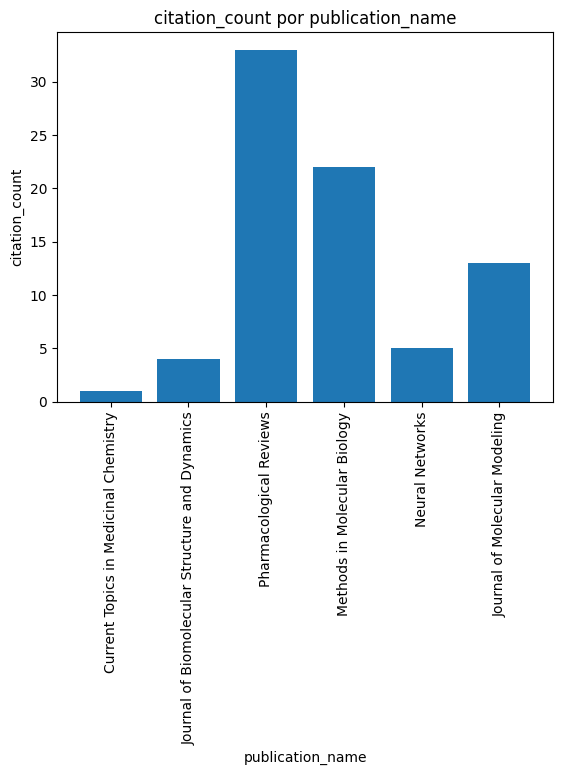

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df)

# Crear el gráfico de barras
plt.bar(df['publication_name'], df['citation_count'])

# Agregar etiquetas y título
plt.xlabel('publication_name')
plt.ylabel('citation_count')
plt.title('citation_count por publication_name')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()